<a href="https://colab.research.google.com/github/lcqsigi/big-data2/blob/main/iris3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.datasets import load_iris

In [3]:
#import tensorflow_datasets as tfds
#iris,info=tfds.load('iris', data_dir='/root/tensorflow_datasets/iris/2.0.0/', download=True,with_info=True,split='train')
iris = load_iris()

In [9]:
import pandas as pd
import numpy as np
#df = tfds.as_dataframe(iris,info)
#df[['feature1','feature2', 'feature3', 'feature4']] = \
#    pd.DataFrame(df['features'].tolist(), index= df.index)
#df = df.drop('features', axis=1)
#df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [10]:
# load dataset
#dataframe = pandas.read_csv("iris.data", header=None)
df = df.values

In [11]:
X = df[:,0:4].astype(float)
Y = df[:,4]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,dummy_y,test_size=0.3,random_state=8)

In [16]:
# define baseline model
#def baseline_model():
 # create model
model = Sequential()
model.add(Dense(16, input_dim=4, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))
# Compile model
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#return model
 
#estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
#kfold = KFold(n_splits=10, shuffle=True)
#results = cross_val_score(estimator, X, dummy_y, cv=kfold)
#print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [17]:
history=model.fit(X_train,y_train,batch_size=2,epochs=100)

Epoch 1/100
53/53 [==============================] - 1s 1ms/step - loss: 1.1023 - accuracy: 0.3429
Epoch 2/100
53/53 [==============================] - 0s 1ms/step - loss: 1.0532 - accuracy: 0.5238
Epoch 3/100
53/53 [==============================] - 0s 1ms/step - loss: 1.0170 - accuracy: 0.6857
Epoch 4/100
53/53 [==============================] - 0s 1ms/step - loss: 0.9765 - accuracy: 0.6571
Epoch 5/100
53/53 [==============================] - 0s 1ms/step - loss: 0.9365 - accuracy: 0.7714
Epoch 6/100
53/53 [==============================] - 0s 2ms/step - loss: 0.8995 - accuracy: 0.6762
Epoch 7/100
53/53 [==============================] - 0s 2ms/step - loss: 0.8585 - accuracy: 0.6857
Epoch 8/100
53/53 [==============================] - 0s 2ms/step - loss: 0.8235 - accuracy: 0.8381
Epoch 9/100
53/53 [==============================] - 0s 2ms/step - loss: 0.7909 - accuracy: 0.6762
Epoch 10/100
53/53 [==============================] - 0s 2ms/step - loss: 0.7571 - accuracy: 0.7905
Epoch 11/

In [18]:
y_hat=model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


In [19]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.1562 - accuracy: 0.9778


[0.15624147653579712, 0.9777777791023254]

In [20]:
import numpy as np
y_test_class=np.argmax(y_test,axis=1)
y_pred_class=np.argmax(y_hat,axis=1)

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion_matrix(y_test_class,y_pred_class)

array([[15,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 14]])

In [23]:
import matplotlib.pyplot as plt

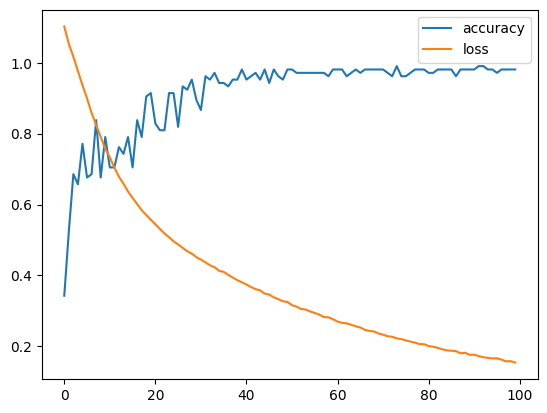

In [24]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['loss'],label='loss')
plt.legend()
plt.show()